<a href="https://colab.research.google.com/github/KushiBetaraju/Air-Temperature-Prediction-Model/blob/main/Air_Temperature_Prediction_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import numpy as np

1. Load and Clean Dataset

In [ ]:
data = pd.read_csv("/content/cleaned_weather.csv")
data.columns = data.columns.str.strip()
data = data.dropna()

2. Select Feathures and Target

In [ ]:
features = ['Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'rho', 'wv', 'max. wv']
target = 'T'

X = data[features]
y = data[target]

3. Binning the Taget for Classification Metrics

In [ ]:
# Example: Classofcation temperature as 'hot' if >25°C
y_class = (y > 25).astype(int)  # 1 = hot, 0 = not hot

4. Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_class_train = (y_train > 25).astype(int)
y_class_test = (y_test > 25).astype(int)

5. Train the Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6. Evaluation Function

In [ ]:
def evaluate_model(X, y_true, y_class_true, dataset_name=""):
    y_pred = model.predict(X)
    y_class_pred = (y_pred > 25).astype(int)

    # Regression metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Classification metrics (in %)
    acc = accuracy_score(y_class_true, y_class_pred) * 100
    prec = precision_score(y_class_true, y_class_pred) * 100
    rec = recall_score(y_class_true, y_class_pred) * 100
    f1 = f1_score(y_class_true, y_class_pred) * 100

    print(f"\n=== 📊 Evaluation on {dataset_name} ===")
    print(f"📈 R² Score      : {r2:.4f}")
    print(f"📉 MSE           : {mse:.4f}")
    print(f"📉 MAE           : {mae:.4f}")
    print(f"🎯 Accuracy      : {acc:.2f}%")
    print(f"🔍 Precision     : {prec:.2f}%")
    print(f"♻️ Recall        : {rec:.2f}%")
    print(f"🎯 F1 Score      : {f1:.2f}%")

    return r2


7. Evaluate on Training & Test Set

In [ ]:
r2_train = evaluate_model(X_train, y_train, y_class_train, "Training Set")
r2_test = evaluate_model(X_test, y_test, y_class_test, "Test Set")


=== 📊 Evaluation on Training Set ===
📈 R² Score      : 0.9999
📉 MSE           : 0.0011
📉 MAE           : 0.0236
🎯 Accuracy      : 100.00%
🔍 Precision     : 0.00%
♻️ Recall        : 0.00%
🎯 F1 Score      : 0.00%

=== 📊 Evaluation on Test Set ===
📈 R² Score      : 0.9999
📉 MSE           : 0.0011
📉 MAE           : 0.0233
🎯 Accuracy      : 100.00%
🔍 Precision     : 0.00%
♻️ Recall        : 0.00%
🎯 F1 Score      : 0.00%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py

8. Overfitting Detection

In [ ]:
print("\n=== ⚠️ Overfitting Check ===")
if r2_train - r2_test > 0.10:
    print("Model might be overfitting! Consider regularization or more data.")
else:
    print("✅ No significant overfitting detected.")


=== ⚠️ Overfitting Check ===
✅ No significant overfitting detected.


9. Visualization

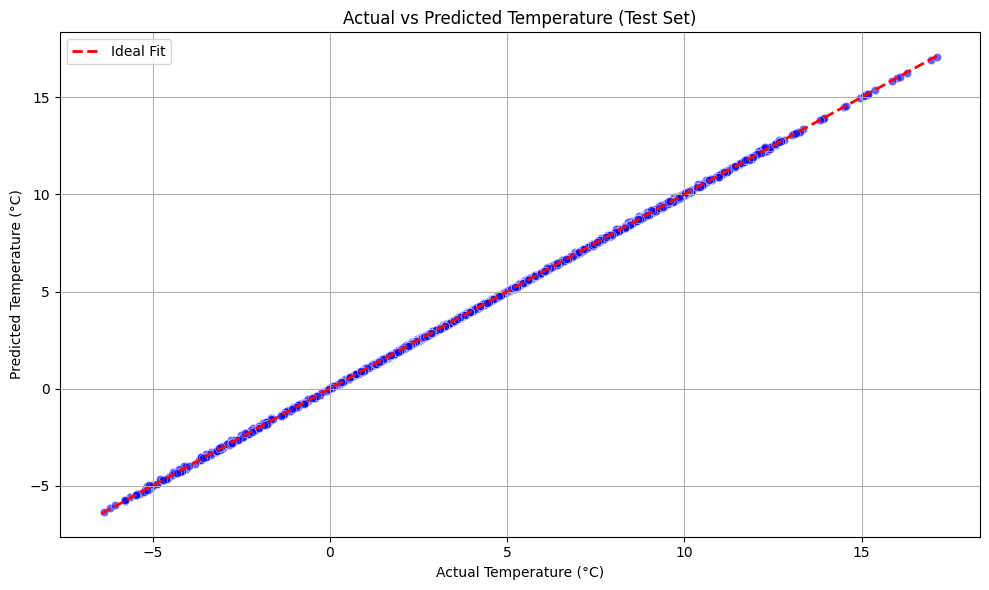

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=model.predict(X_test), alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

10. Real-Time Prediction (User Input)

In [ ]:
print("\n=== 🌡️ Real-Time Temperature Prediction ===")
print("Enter the values based on dataset units:\n")

input_prompts = {
    'Tpot': "Potential Temperature (K): ",
    'Tdew': "Dew Point Temperature (°C): ",
    'rh': "Relative Humidity (%): ",
    'VPmax': "Max Vapor Pressure (mbar): ",
    'VPact': "Actual Vapor Pressure (mbar): ",
    'VPdef': "Vapor Pressure Deficit (mbar): ",
    'rho': "Air Density (g/m³): ",
    'wv': "Wind Velocity (m/s): ",
    'max. wv': "Max Wind Velocity (m/s): "
}

user_input = []
for feature, prompt in input_prompts.items():
    while True:
        try:
            value = float(input(prompt))
            user_input.append(value)
            break
        except ValueError:
            print("❌ Invalid input. Please enter a number.")

user_df = pd.DataFrame([user_input], columns=features)
user_pred = model.predict(user_df)[0]
user_class = "🔥 Hot (>25°C)" if user_pred > 25 else "❄️ Not Hot (≤25°C)"

print(f"\n✅ Predicted Air Temperature: {user_pred:.2f} °C → {user_class}")



=== 🌡️ Real-Time Temperature Prediction ===
Enter the values based on dataset units:

Potential Temperature (K): 320
Dew Point Temperature (°C): 20
Relative Humidity (%): 91
Max Vapor Pressure (mbar): 24.8
Actual Vapor Pressure (mbar): 22.6
Vapor Pressure Deficit (mbar): 24.8
Air Density (g/m³): 1199.3
Wind Velocity (m/s): 2.24
Max Wind Velocity (m/s): 2.24

✅ Predicted Air Temperature: 58.75 °C → 🔥 Hot (>25°C)
